# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rifqy Naufal Azmi
- **Email:** m001b4ky3857@bangkit.academy
- **ID Dicoding:** rifqy_naufal_azmi99

## Menentukan Pertanyaan Bisnis

- Pada waktu kapankah terjadi peminjaman sepeda terbanyak?
- Bagaimana perkembangan peminjaman sepeda dari tahun 2011 sampai 2012?

## Import Semua Packages/Library yang Digunakan

In [420]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [421]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [422]:
path = '/content/drive/MyDrive/FINAL PROJECT DICODING'
df_day = pd.read_csv(path + "/day.csv")
df_day.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [423]:
df_hour = pd.read_csv(path + "/hour.csv")
df_day.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset day.csv dan hour.csv berhasil diakses
- Perlu dilakukan assessing data

### Assessing Data

#### day.csv

In [424]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


1 tipe data berupa object dari atribut "dteday"

In [425]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [426]:
df_day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Tidak ada missing value pada dataset day.csv

In [427]:
print("Duplicate count: ", df_day.duplicated().sum())

Duplicate count:  0


Tidak ada duplicate value pada dataset day.csv

In [428]:
df_day.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


In [474]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

print(df_day.columns, "\n")
print(df_day['dteday'].dtype)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object') 

datetime64[ns]


In [431]:
df_day.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [432]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### hour.csv

In [433]:
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [434]:
df_hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [435]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [436]:
print("Duplicate count: ", df_hour.duplicated().sum())

Duplicate count:  0


In [437]:
df_hour.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [475]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

print(df_hour.columns, "\n")
print(df_hour['dteday'].dtype)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object') 

datetime64[ns]


In [439]:
df_hour.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- Kedua dataset tidak missing value dan duplikasi
- Tipe data object dari atribut "dteday" berhasil diubah menjadi datetime

### Cleaning Data

### day.csv

In [476]:
df_day_2 = df_day.rename(columns={'weathersit':'weather', 'yr':'year', 'mnth':'month', 'hum':'humidity', 'cnt':'count'})
df_day_2 = df_day_2.drop(columns = ['instant' , 'dteday'])
df_day_2.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### hour.csv

In [441]:
df_hour_2 = df_hour.rename(columns={'weathersit':'weather', 'yr':'year', 'mnth':'month', 'hr':'hour','hum':'humidity', 'cnt':'count'})
df_hour_2 = df_hour_2.drop(columns = ['instant' , 'dteday'])
df_hour_2.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Tidak ada proses cleaning data karena tidak ada missing value dan outlier signifikan
- Hanya terjadi perubahan nama label agar mudah dipahami

## Exploratory Data Analysis (EDA)

### day.csv

In [442]:
df_day_2.describe()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


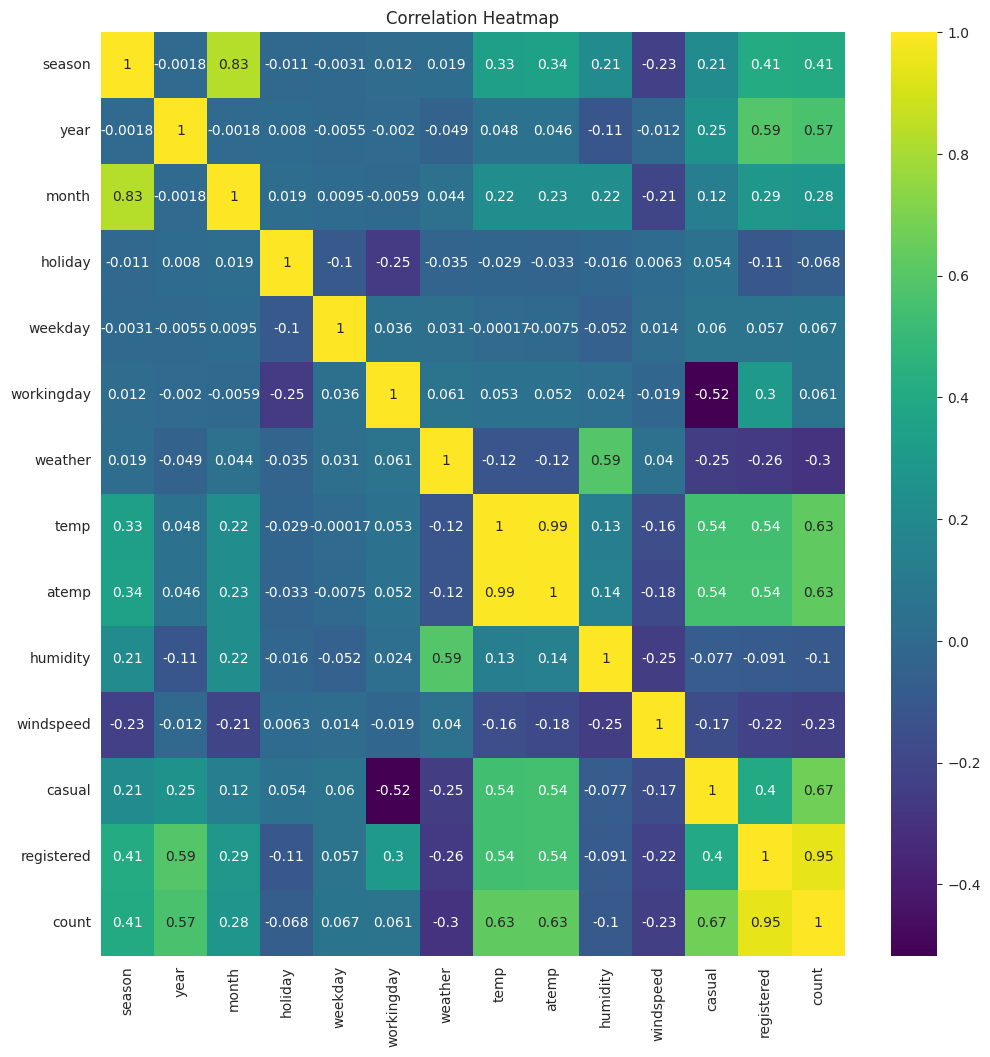

In [444]:
corr_day = df_day_2.corr()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
sns.heatmap(corr_day, annot=True, cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()

In [477]:
colnames=corr_day.columns
temp=[]
for i in range(1, len(corr_day)):
    for j in range(i):
        if abs(val:=corr_day.values[j][i]) > 0.499:
            temp.append([colnames[j], colnames[i],val])
sorted(temp, key=lambda x:x[2], reverse=True)

[['temp', 'atemp', 0.9917015532294647],
 ['registered', 'count', 0.9455169158090359],
 ['season', 'month', 0.8314401142104252],
 ['casual', 'count', 0.6728044333386828],
 ['atemp', 'count', 0.6310656998491828],
 ['temp', 'count', 0.6274940090334914],
 ['year', 'registered', 0.5942481679351358],
 ['weather', 'humidity', 0.5910445992972735],
 ['year', 'count', 0.5667097078680867],
 ['atemp', 'registered', 0.5441917576380151],
 ['atemp', 'casual', 0.5438636902622062],
 ['temp', 'casual', 0.5432846616821875],
 ['temp', 'registered', 0.5400119661617868],
 ['workingday', 'casual', -0.5180441913348242]]

### hour.csv

In [450]:
df_hour_2.describe()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


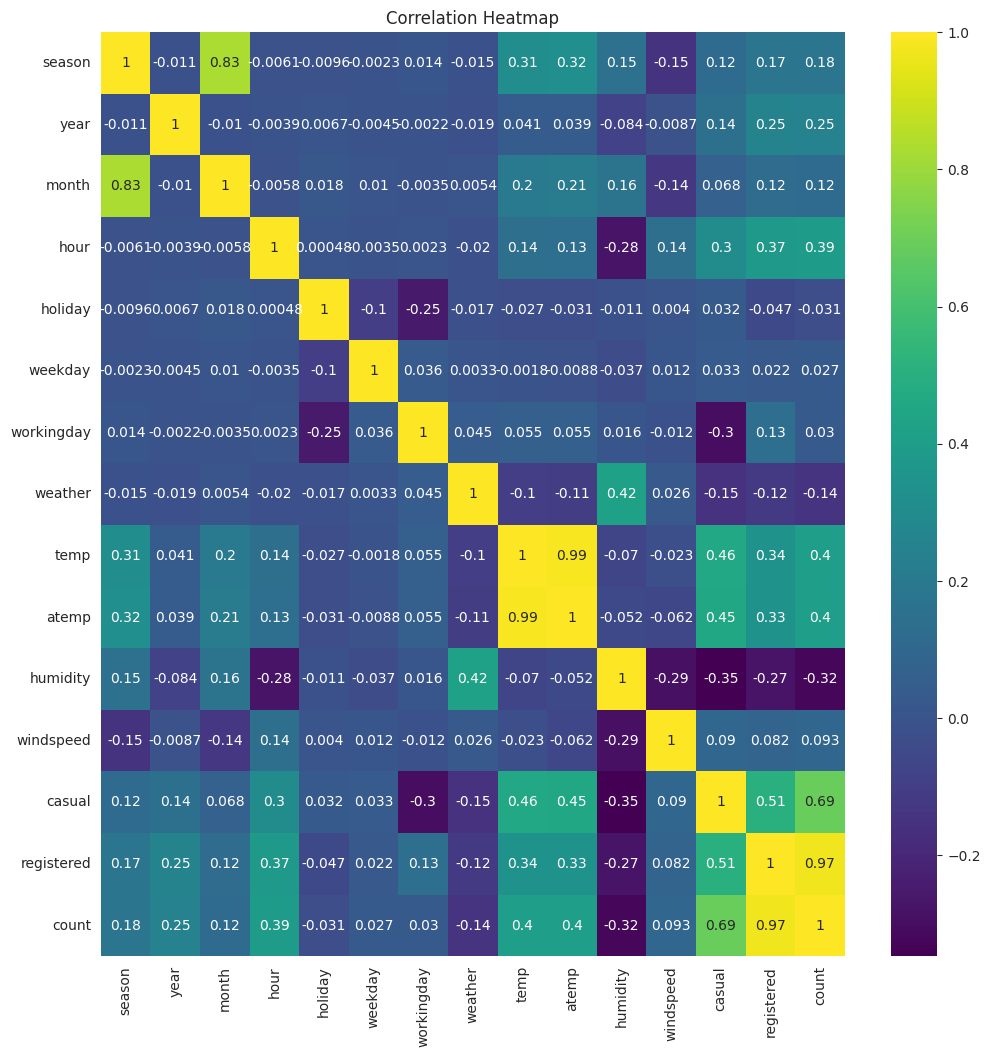

In [452]:
corr_hour = df_hour_2.corr()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
sns.heatmap(corr_hour, annot=True, cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()

In [453]:
colnames=corr_hour.columns
temp=[]
for i in range(1, len(corr_hour)):
    for j in range(i):
        if abs(val:=corr_hour.values[j][i]) > 0.499:
          temp.append([colnames[j], colnames[i],val])
sorted(temp, key=lambda x:x[2], reverse=True)

[['temp', 'atemp', 0.9876721390396437],
 ['registered', 'count', 0.9721507308642957],
 ['season', 'month', 0.8303858922042007],
 ['casual', 'count', 0.6945640779749468],
 ['casual', 'registered', 0.5066177004294652],
 ['temp', 'casual', 0.45961564554484974],
 ['atemp', 'casual', 0.45408006533291106],
 ['weather', 'humidity', 0.4181303287518022],
 ['temp', 'count', 0.4047722757786578],
 ['atemp', 'count', 0.4009293041266357]]

**Insight:**
- Kedua dataset day.csv dan hour.csv dieksplorasi variabel yang memiliki derajat korelasi absolut lebih dari 0.499 agar mendapatkan variabel yang berkorelasi cukup kuat sampai sangat kuat
- Beberapa pasangan variabel seperti atempt-temp, registered-count, season-month, casual-count, casual-registered memiliki korelasi > 0.5, tetapi pasangan variabel tersebut tidak memberikan wawasan signifikan karena menggunakan parameter yang sama

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada waktu kapankah sepeda paling banyak dipinjam?

In [455]:
reg_per_hour = df_hour_2.groupby("hour").registered.sum().sort_values(ascending=False).reset_index()
reg_per_hour.head()

,hour,registered
0,17,282640
1,18,265276
2,8,245240
3,19,191284
4,16,173914


In [456]:
casual_per_hour = df_hour_2.groupby("hour").casual.sum().sort_values(ascending=False).reset_index()
casual_per_hour.head()

,hour,casual
0,14,55089
1,15,54606
2,17,54220
3,16,53834
4,13,52713


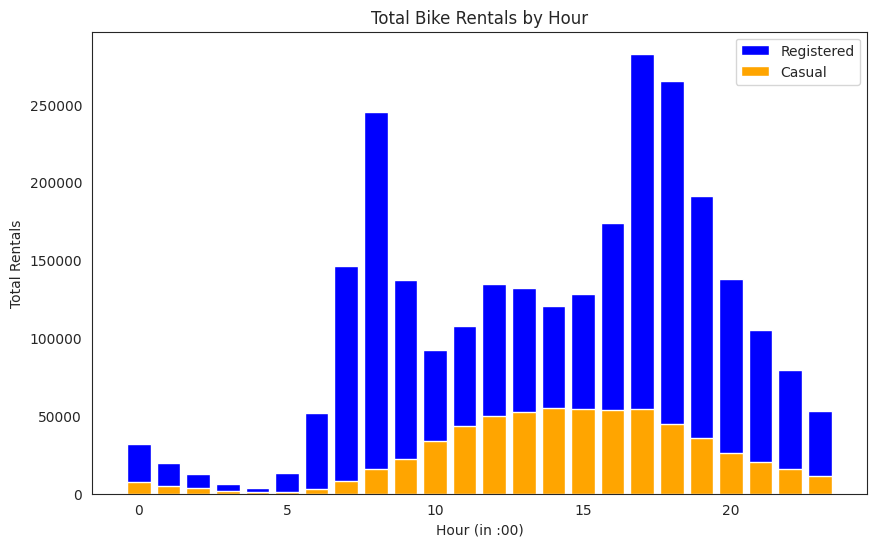

In [480]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(reg_per_hour['hour'], reg_per_hour['registered'], label='Registered', color='blue')
ax.bar(casual_per_hour['hour'], casual_per_hour['casual'], label='Casual', color='orange')
ax.set_title('Total Bike Rentals by Hour')
ax.set_xlabel('Hour (in :00)')
ax.set_ylabel('Total Rentals')
ax.legend()
plt.show()


### Pertanyaan 2: Bagaimana perkembangan peminjaman sepeda dari tahun 2011 sampai 2012?

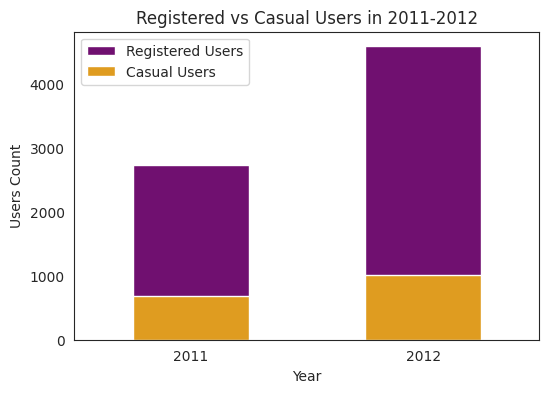

In [495]:
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x='year', y='registered', data=df_day_2, label='Registered Users', color='purple', ax=ax, width=0.5, errorbar=None)
sns.barplot(x='year', y='casual', data=df_day_2, label='Casual Users', color='orange', ax=ax, width=0.5, errorbar=None)
ax.set_title('Registered vs Casual Users in 2011-2012')
ax.set_xticks([0, 1])
ax.set_xticklabels(['2011', '2012'])
ax.set_xlabel('Year')
ax.set_ylabel('Users Count')
plt.legend()
plt.show()

**Insight:**
- Pada umumnya, penyewa yang sudah terdaftar lebih banyak menyewa sepeda daripada penyewa kasual
- Pada pukul 8:00 dan 17:00, penyewa terdaftar paling banyak menyewa sepeda
- Jumlah penyewaan sepeda meningkat dari tahun 2011 menuju tahun 2021 dan berbanding lurus dengan meningkatnya penyewa dari kedua golongan (terdaftar dan kasual)

## Conclusion

- Penyewa disarankan untuk mempersiapkan sepeda dengan jumlah besar pada pukul 08:00 dan 17:00 karena akan banyak kandidat penyewa terdaftar
- Penyewa diharapkan melanjutkan penyewaan sepeda karena terjadi peningkatan dalam satu tahun, berpotensi meningkat pada tahun berikutnya